In [1]:
# load basic libraries
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('takehome_users.csv', encoding='ISO-8859–1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df.shape

(12000, 10)

In [4]:
df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [5]:
df.creation_time = pd.to_datetime(df.creation_time, format='%Y-%m-%d')

In [6]:
df.creation_time = df.creation_time.astype(np.int64)

In [7]:
df2= pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df2.time_stamp = pd.to_datetime(df2.time_stamp, format='%Y-%m-%d')

In [9]:
df2.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [10]:
new_df2 = df2.groupby('user_id').rolling('7D', on='time_stamp').visited.sum()

In [11]:
new_df2 = pd.DataFrame(new_df2).reset_index()

In [12]:
len(new_df2[new_df2.visited>=3].user_id.unique())

1602

In [13]:
new_df2['adopted_user'] = np.where(new_df2.visited>=3, 1,0)

In [14]:
df_adopter = pd.DataFrame(new_df2.groupby('user_id')['adopted_user'].sum()>=1).reset_index()

In [15]:
df_adopter.adopted_user = df_adopter.adopted_user.astype('int64')

In [16]:
df_adopter.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [17]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1398138810000000000,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,1384487104000000000,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,1363734892000000000,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,1369123768000000000,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1358417660000000000,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [18]:
final_df = df.join(df_adopter.set_index('user_id'), on ='object_id')

In [19]:
final_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,1398138810000000000,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,1384487104000000000,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,1363734892000000000,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,1369123768000000000,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,1358417660000000000,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [20]:
final_df.adopted_user.value_counts(dropna=False)

0.0    7221
NaN    3177
1.0    1602
Name: adopted_user, dtype: int64

In [21]:
final_df.dtypes

object_id                       int64
creation_time                   int64
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                  float64
dtype: object

In [22]:
final_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                  3177
dtype: int64

In [23]:
final_df = final_df.drop(['email', 'name'],axis=1)

In [24]:
final_df.adopted_user.fillna(0, inplace=True)

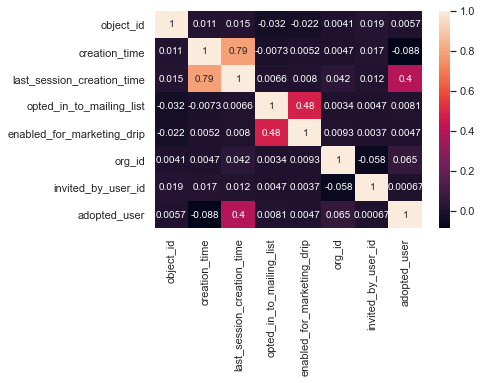

In [25]:
sns.heatmap(final_df.corr(), annot=True)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = final_df.drop(['adopted_user', 'creation_time'], axis=1)
y = final_df.adopted_user

In [28]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [29]:
cat_feature_indices= []

for i, j in enumerate(X.columns):
    if j in cat_features:
        cat_feature_indices.append(i)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X.to_numpy(), y.ravel(), test_size=0.30, stratify=y, random_state=43)

In [31]:
y_test.sum()/len(y_test)

0.13361111111111112

In [32]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold

In [33]:
def trainmodel_cv(model, n):
    
    cv = KFold(n_splits=n)
    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        X_train_fold, y_train_fold = X_train[train], y_train[train]
        X_test_fold, y_test_fold = X_train[test], y_train[test]
        model.fit(X_train_fold, y_train_fold, cat_features = cat_feature_indices, silent=True)
    
    return model

In [34]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [35]:
final_model = trainmodel_cv(CatBoostClassifier(),5)
y_pred = final_model.predict(X_test)
ypred_proba = final_model.predict_proba(X_test)[:,1]


precision, recall, f1score, support = score(y_test, y_pred, pos_label=1,average='binary')
roc_auc = roc_auc_score(y_test, ypred_proba)

accuracy = round(accuracy_score(y_test,y_pred),3)

In [36]:
pd.DataFrame([precision, recall, f1score, roc_auc, accuracy],
                       index=['precison','recall','f1score','roc_auc', 'accuracy']).T

,precison,recall,f1score,roc_auc,accuracy
0,0.742347,0.60499,0.666667,0.917419,0.919


In [37]:
# get feature importance for catboost on train dataset
from catboost import Pool
train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
feature_names = X.columns
#final_model = trainmodel_cv(CatBoostClassifier(iterations=939,  depth=4, learning_rate=0.014877, silent=True), 5)
feature_importances  = final_model.get_feature_importance(train_pool)

feature_df = pd.DataFrame(sorted(zip(feature_importances, feature_names), reverse=True), columns=['Feature Importance', 'Variable'])

In [38]:
feature_df

,Feature Importance,Variable
0,54.947907,last_session_creation_time
1,12.493747,org_id
2,12.211591,object_id
3,10.683132,invited_by_user_id
4,4.668121,creation_source
5,2.501236,opted_in_to_mailing_list
6,2.494266,enabled_for_marketing_drip


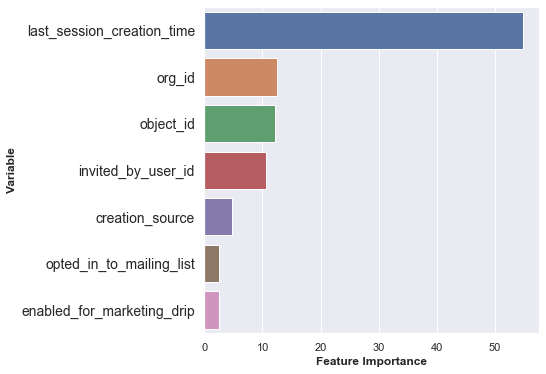

In [39]:

plt.figure(figsize=(6,6))
g = sns.barplot('Feature Importance', 'Variable', data=feature_df)
g.set_xlabel('Feature Importance',fontsize=12,weight='bold')
g.set_ylabel('Variable',size=12,weight='bold')
g.set_yticklabels(g.get_yticklabels(),size=14)
plt.show()